<a href="https://colab.research.google.com/github/SWLee1212/KAIST-ML-Advanced-courses/blob/master/1_4_%EB%8B%A4%ED%96%A5%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

변환 이후 X 데이터
 [[1.         2.64644051 7.00364738]
 [1.         3.1455681  9.89459867]
 [1.         2.80829013 7.88649344]]


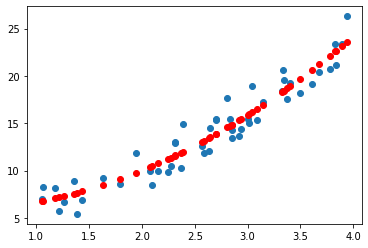

In [2]:
# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 다항 회귀의 입력값을 변환하기 위한 모듈을 불러옵니다.
from sklearn.preprocessing import PolynomialFeatures

def load_data():
    
    np.random.seed(0)
    
    X = 3*np.random.rand(50, 1) + 1
    y = X**2 + X + 2 +5*np.random.rand(50,1)
    
    return X, y
    
"""
1. PolynomialFeature 객체를 활용하여 
   각 변수 값을 제곱하고, 
   데이터에 추가하는 함수를 구현합니다.
   
   Step01. Polynomial 객체를 
           생성합니다.
           
           degree를 2로 설정하고, 
           include_bias 파라미터를 
           True로 설정합니다.
   
   Step02. 변수 값을 제곱하고 
           이를 X에 추가시킨 후 
           poly_X에 저장합니다.
"""
def Polynomial_transform(X):
    
    poly_feat = PolynomialFeatures(degree=2, include_bias = True)
    
    poly_X = poly_feat.fit_transform(X)
    
    print("변환 이후 X 데이터\n",poly_X[:3])
    
    return poly_X
    
"""
2. 다중 선형회귀 모델을 불러오고, 
   불러온 모델을 학습용 데이터에 맞추어 
   학습시킨 후 해당 모델을 반환하는 
   함수를 구현합니다.

   Step01. 사이킷런에 구현되어 있는 
           다중 선형회귀 모델을 불러옵니다.

   Step02. 불러온 모델을 제곱값이 추가된 
           데이터에 맞춰 학습시킵니다.
"""
def Multi_Regression(poly_x, y):
    
    multilinear = LinearRegression()
    
    multilinear.fit(poly_x,y)
    
    return multilinear
    
    
# 그래프를 시각화하는 함수입니다.
def plotting_graph(x,y,predicted):
    fig = plt.figure()
    plt.scatter(x, y)
    
    plt.scatter(x, predicted,c='r')
    plt.savefig("test.png")
    plt.show()
    # elice_utils.send_image("test.png")
    
    
"""
3. 모델 학습 및 예측 결과 확인을 위한 
   main 함수를 완성합니다.
   
   학습이 완료된 모델을 활용하여 
   테스트 데이터에 대한 예측을 수행합니다.
"""
def main():
    
    X,y = load_data()
    
    poly_x = Polynomial_transform(X)
    
    linear_model = Multi_Regression(poly_x,y)
    
    predicted = linear_model.predict(poly_x)
    
    plotting_graph(X,y,predicted)
    
    return predicted
    
if __name__=="__main__":
    main()